-Name: Waris Hayat

-linkedin: https://www.linkedin.com/in/warishayat/

-Github : https://github.com/Warishayat?tab=repositories

-kaggle : https://www.kaggle.com/wariishayat

-email: Warishayat666@gmail.com / warishayat69@gmail.com

# **Title : Decthon AIML Competition**

***Overall step by step Approach to solve problem***

***1: Understanding the Problem & Data Loading***

***2: Exploratory Data Analysis (EDA)***

***3: Feature Engineering if needeed***

***4: Model Selection & Training***

***5: Hyperparameter Tuning (if time permits)***

***6: Evaluation like F1-score/pricison/recall***

**7: Final Submission in form of csv ***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
#load the dataset
df_train=pd.read_csv("/content/participants_training_dataset.csv")
df_test = pd.read_csv("/content/participants_test_dataset.csv")
df_train.sample()

,User_Key,Birth_Year,Edu_Level,Family_Status,Annual_Income,Kids_Count,Teens_Count,Reg_Date,Last_Visit,Spent_Wines,...,Web_Visits,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Complaint_Flag,Contact_Cost,Total_Revenue,Next_Purchase
419,5626,1964,PhD,Single,61798.0,0,0,23-11-2013,13,338,...,4,0,0,0,0,0,0,3,11,0


In [20]:
df_test.sample(5)

,User_Key,Birth_Year,Edu_Level,Family_Status,Annual_Income,Kids_Count,Teens_Count,Reg_Date,Last_Visit,Spent_Wines,...,Store_Orders,Web_Visits,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Complaint_Flag,Contact_Cost,Total_Revenue
214,3102,1981,2n Cycle,Together,19414.0,1,0,16-10-2013,32,2,...,3,8,0,0,0,0,0,0,3,11
199,10286,1962,Graduation,Married,83715.0,0,0,03-02-2014,2,318,...,13,0,0,0,0,0,0,0,3,11
22,4491,1949,Master,Married,62845.0,1,1,01-10-2012,3,1099,...,10,8,0,1,0,0,0,0,3,11
175,4093,1975,Master,Together,53253.0,1,1,11-02-2013,61,216,...,5,5,0,0,0,0,0,0,3,11
54,5430,1956,Graduation,Together,54450.0,1,1,14-09-2012,0,454,...,8,8,0,0,0,0,0,0,3,11


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User_Key         2016 non-null   int64  
 1   Birth_Year       2016 non-null   int64  
 2   Edu_Level        2016 non-null   object 
 3   Family_Status    2016 non-null   object 
 4   Annual_Income    1993 non-null   float64
 5   Kids_Count       2016 non-null   int64  
 6   Teens_Count      2016 non-null   int64  
 7   Reg_Date         2016 non-null   object 
 8   Last_Visit       2016 non-null   int64  
 9   Spent_Wines      2016 non-null   int64  
 10  Spent_Fruits     2016 non-null   int64  
 11  Spent_Meat       2016 non-null   int64  
 12  Spent_Fish       2016 non-null   int64  
 13  Spent_Sweets     2016 non-null   int64  
 14  Spent_Gold       2016 non-null   int64  
 15  Promo_Purchases  2016 non-null   int64  
 16  Web_Orders       2016 non-null   int64  
 17  Catalog_Orders

In [12]:
df_train.isnull().sum()

,0
User_Key,0
Birth_Year,0
Edu_Level,0
Family_Status,0
Annual_Income,23
Kids_Count,0
Teens_Count,0
Reg_Date,0
Last_Visit,0
Spent_Wines,0


In [22]:
df_train.duplicated().sum() #there is a duplicate value

0

In [23]:
df_train.describe(include="object")

,Edu_Level,Family_Status,Reg_Date
count,2016,2016,2016
unique,5,8,654
top,Graduation,Married,31-08-2012
freq,1012,780,11


In [25]:
df_train.describe()

,User_Key,Birth_Year,Annual_Income,Kids_Count,Teens_Count,Last_Visit,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,...,Web_Visits,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Complaint_Flag,Contact_Cost,Total_Revenue,Next_Purchase
count,2016.000000,2016.000000,1993.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,...,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.0,2016.0,2016.000000
mean,5547.360615,1968.828869,52460.201204,0.441468,0.509425,49.338790,307.782242,26.379464,168.105159,37.573413,...,5.320933,0.071429,0.074405,0.071925,0.063988,0.013393,0.009425,3.0,11.0,0.147321
std,3252.987025,11.999503,25596.195478,0.538859,0.544688,28.974855,338.210356,39.808018,225.216159,54.532714,...,2.438052,0.257603,0.262494,0.258427,0.244792,0.114978,0.096646,0.0,0.0,0.354514
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2745.250000,1959.000000,35688.000000,0.000000,0.000000,24.750000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5454.500000,1970.000000,51479.000000,0.000000,0.000000,50.000000,180.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8373.500000,1977.000000,68655.000000,1.000000,1.000000,74.000000,509.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [31]:
df_train["Edu_Level"].value_counts()

,count
Edu_Level,
Graduation,1012
PhD,437
Master,337
2n Cycle,183
Basic,47


In [35]:
#handle the education
from sklearn.preprocessing import OrdinalEncoder
education_order = [['Basic', '2n Cycle', 'Master', 'Graduation', 'PhD']]
le=OrdinalEncoder(categories=education_order)
df_train["Edu_Level"]=le.fit_transform(df_train[["Edu_Level"]])
df_train["Edu_Level"].value_counts()

,count
Edu_Level,
3.0,1012
4.0,437
2.0,337
1.0,183
0.0,47


In [41]:
#Now handle the Family_Status
#Since we have rare values like "YOLO", we can replace each category with its frequency coun
df_train['Family_Status_freq'] = df_train['Family_Status'].map(df_train['Family_Status'].value_counts())
df_train.drop('Family_Status', axis=1, inplace=True)
df_train.sample(2)

,User_Key,Birth_Year,Edu_Level,Annual_Income,Kids_Count,Teens_Count,Reg_Date,Last_Visit,Spent_Wines,Spent_Fruits,...,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Complaint_Flag,Contact_Cost,Total_Revenue,Next_Purchase,Family_Status_freq
149,8702,1976,1.0,26907.0,1,1,20-08-2013,10,9,1,...,0,0,0,0,0,0,3,11,0,519
1961,3783,1959,4.0,52854.0,1,1,24-03-2014,43,105,0,...,0,0,0,0,0,0,3,11,0,780


In [48]:
# since our columns Reg_Date is object we will convert this into data time formate
df_train["Reg_Date"]=pd.to_datetime(df_train["Reg_Date"],format='%d-%m-%Y')
df_train["Reg_Date"].sample(2)

,Reg_Date
656,2013-06-10
904,2013-01-25


In [51]:
#since our data has some missing values
df_train.isnull().sum()
df_train["Annual_Income"]=df_train["Annual_Income"].fillna(df_train["Annual_Income"].mean()) #i will try to fill it  with the mean value

In [52]:
#check again the null values
df_train.isnull().sum()

,0
User_Key,0
Birth_Year,0
Edu_Level,0
Annual_Income,0
Kids_Count,0
Teens_Count,0
Reg_Date,0
Last_Visit,0
Spent_Wines,0
Spent_Fruits,0


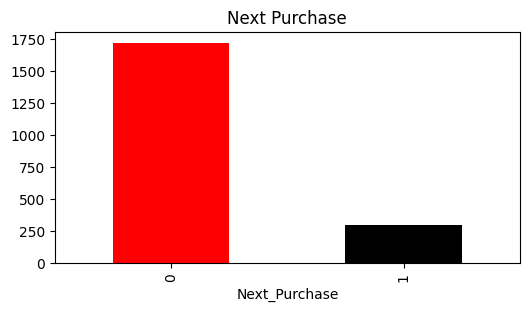

In [55]:
#eda
plt.figure(figsize=(6, 3))
df_train["Next_Purchase"].value_counts().plot(kind="bar",color=["red","black"])
plt.title("Next Purchase")
plt.show()
#we have to keep in mind our data is imbalanced we will more focous on pricison and recall scores

<Figure size 600x300 with 0 Axes>

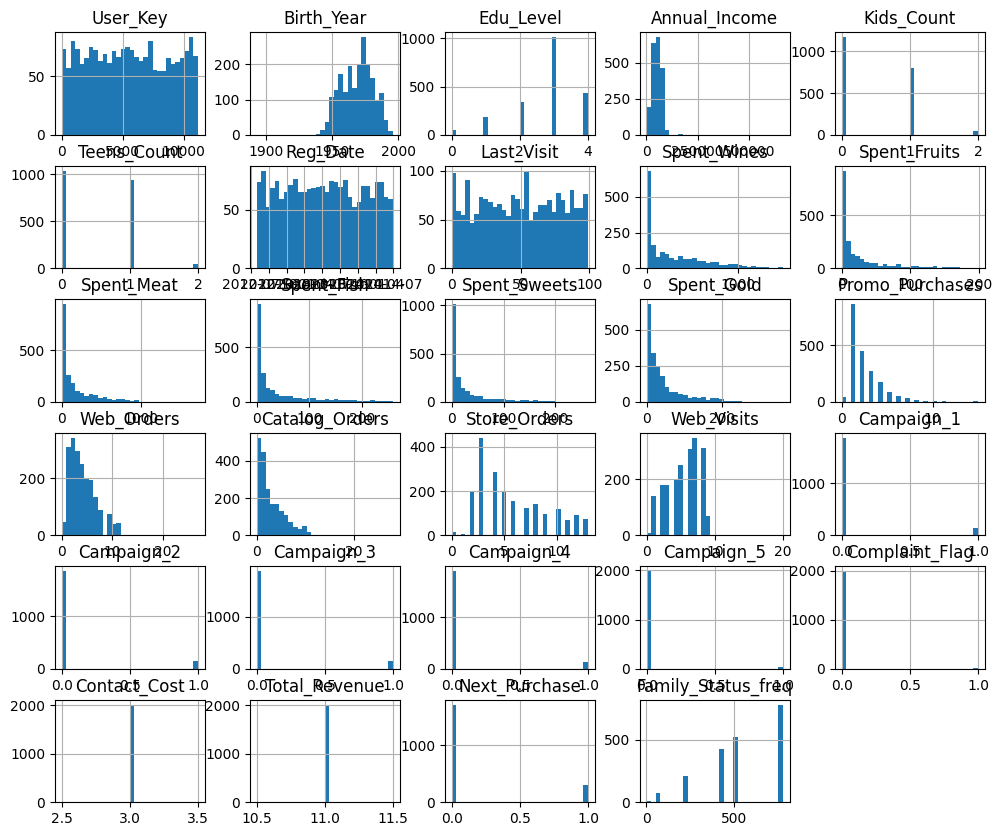

In [56]:
plt.figure(figsize=(6, 3))
df_train.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   User_Key            2016 non-null   int64         
 1   Birth_Year          2016 non-null   int64         
 2   Edu_Level           2016 non-null   float64       
 3   Annual_Income       2016 non-null   float64       
 4   Kids_Count          2016 non-null   int64         
 5   Teens_Count         2016 non-null   int64         
 6   Reg_Date            2016 non-null   datetime64[ns]
 7   Last_Visit          2016 non-null   int64         
 8   Spent_Wines         2016 non-null   int64         
 9   Spent_Fruits        2016 non-null   int64         
 10  Spent_Meat          2016 non-null   int64         
 11  Spent_Fish          2016 non-null   int64         
 12  Spent_Sweets        2016 non-null   int64         
 13  Spent_Gold          2016 non-null   int64       

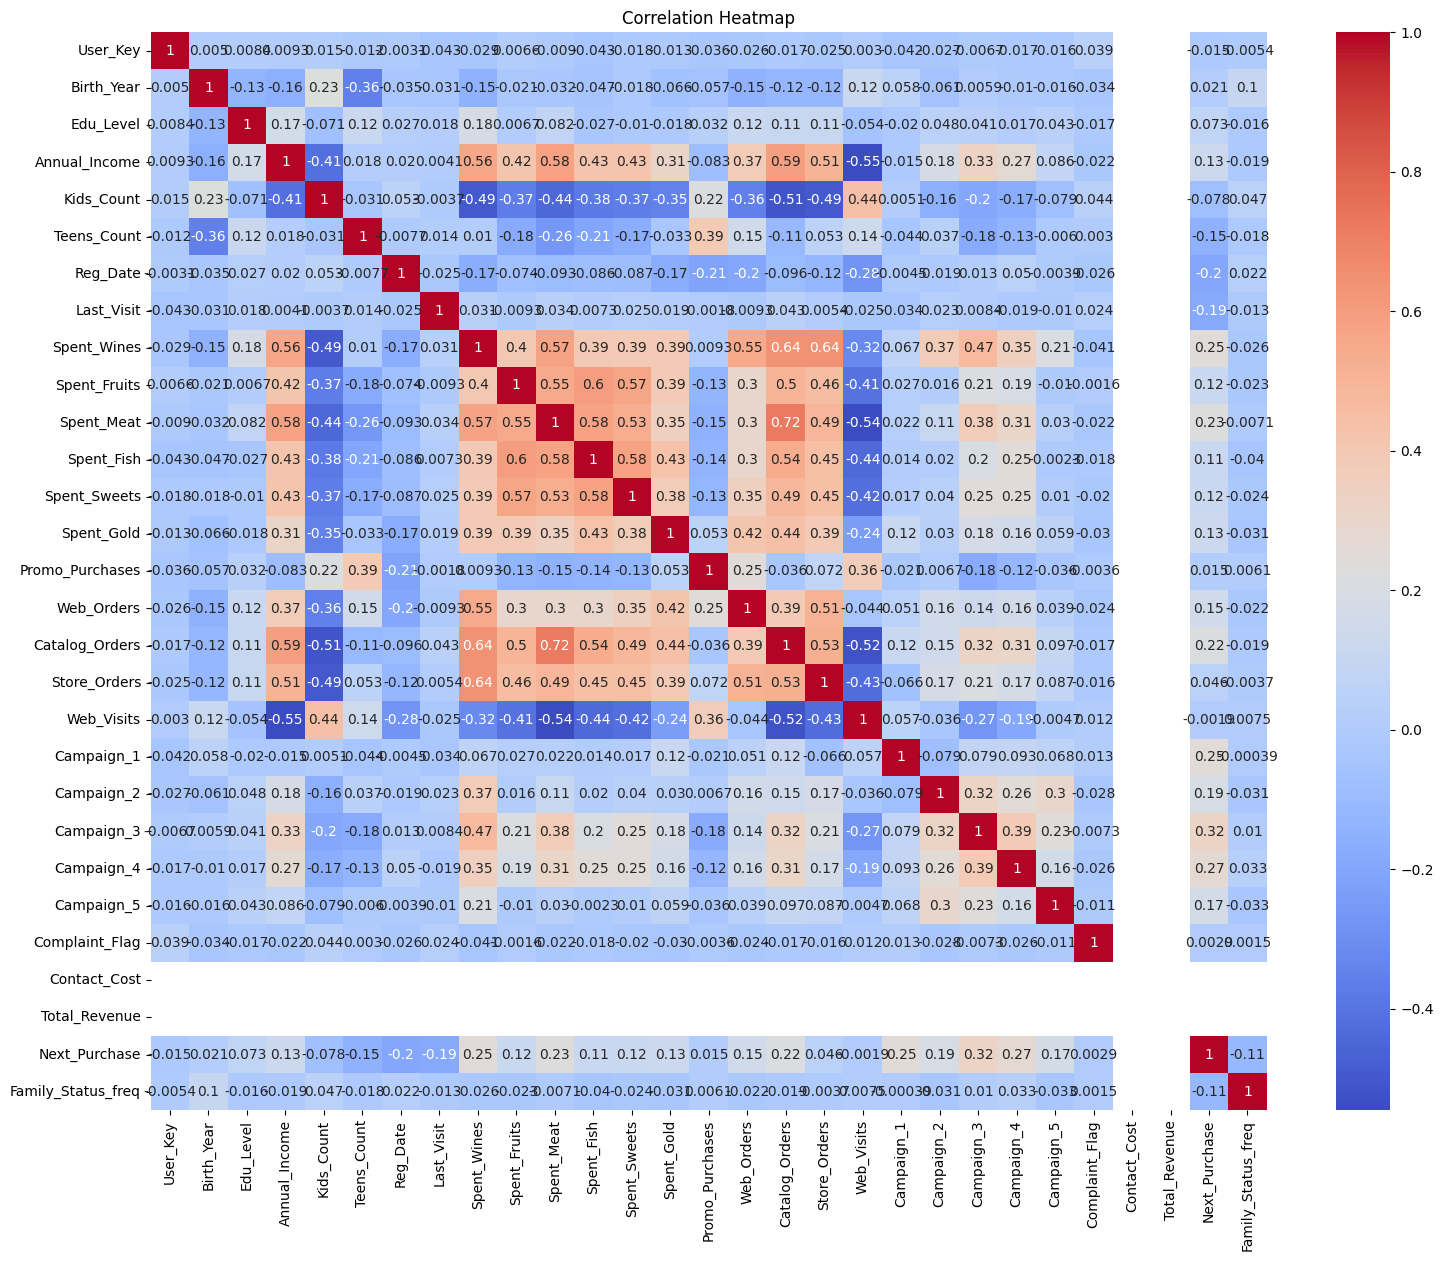

In [70]:
#check the correlation
plt.figure(figsize=(18, 14))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

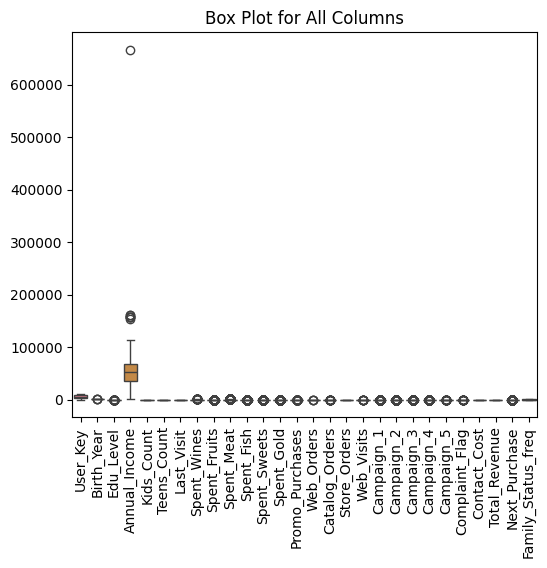

In [72]:
numeric_columns = df_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(6, 5))
sns.boxplot(data=df_train[numeric_columns])

plt.xticks(rotation=90)
plt.title('Box Plot for All Columns')
plt.show()  #there is a outlier in the Annual income but i will go the lagoritham that handle these

In [75]:
#dependent and independent variable
X=df_train.drop(columns=["Next_Purchase"])
y=df_train["Next_Purchase"]

In [77]:
#train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1612, 28), (404, 28), (1612,), (404,))

In [82]:

X_train['Reg_Date'] = pd.to_datetime(X_train['Reg_Date'])
X_test['Reg_Date'] = pd.to_datetime(X_test['Reg_Date'])

X_train['Reg_Date'] = (X_train['Reg_Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
X_test['Reg_Date'] = (X_test['Reg_Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Now, apply scaling (only numeric columns)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))


In [83]:
from xgboost import XGBClassifier
classifer = XGBClassifier()
classifer.fit(X_train_scaled, y_train)
y_pred = classifer.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8910891089108911
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       341
           1       0.76      0.44      0.56        63

    accuracy                           0.89       404
   macro avg       0.83      0.71      0.75       404
weighted avg       0.88      0.89      0.88       404



In [84]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[332   9]
 [ 35  28]]


In [85]:
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier()
classifer.fit(X_train_scaled, y_train)
y_pred = classifer.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8712871287128713
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       341
           1       0.79      0.24      0.37        63

    accuracy                           0.87       404
   macro avg       0.83      0.61      0.65       404
weighted avg       0.86      0.87      0.84       404



In [100]:
df_test

,User_Key,Birth_Year,Edu_Level,Family_Status,Annual_Income,Kids_Count,Teens_Count,Reg_Date,Last_Visit,Spent_Wines,...,Store_Orders,Web_Visits,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Complaint_Flag,Contact_Cost,Total_Revenue
0,9370,1945,PhD,Married,65846.0,0,0,17-05-2013,68,562,...,6,4,0,0,0,0,0,0,3,11
1,4682,1958,Graduation,Married,51876.0,0,0,15-10-2013,88,99,...,8,1,0,0,0,0,0,0,3,11
2,4530,1948,Master,Widow,78427.0,0,0,24-10-2012,36,972,...,10,3,0,0,0,1,0,0,3,11
3,8212,1971,Master,Married,39791.0,0,1,28-03-2013,89,85,...,4,7,0,0,0,0,0,0,3,11
4,6409,1967,Graduation,Divorced,57136.0,0,0,18-05-2013,18,267,...,7,6,0,0,0,0,0,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,10785,1969,Graduation,Married,44078.0,1,1,19-06-2014,17,24,...,3,5,0,0,0,0,0,0,3,11
220,9964,1979,Graduation,Single,61825.0,0,1,07-08-2013,56,162,...,8,4,0,0,0,0,0,0,3,11
221,3412,1951,Master,Married,67381.0,0,1,15-01-2013,67,815,...,9,7,0,1,0,0,0,0,3,11
222,2811,1963,PhD,Single,48918.0,1,1,12-04-2014,21,52,...,4,4,0,0,0,0,0,0,3,11


In [101]:
#handle the education
from sklearn.preprocessing import OrdinalEncoder
education_order = [['Basic', '2n Cycle', 'Master', 'Graduation', 'PhD']]
le=OrdinalEncoder(categories=education_order)
df_test["Edu_Level"]=le.fit_transform(df_test[["Edu_Level"]])
df_test["Edu_Level"].value_counts()

,count
Edu_Level,
3.0,115
4.0,49
2.0,33
1.0,20
0.0,7


In [ ]:
df_test['Reg_Date'] = pd.to_datetime(df_test['Reg_Date'])
df_test['Reg_Date'] = (df_test['Reg_Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_Key            224 non-null    int64  
 1   Birth_Year          224 non-null    int64  
 2   Edu_Level           224 non-null    float64
 3   Annual_Income       223 non-null    float64
 4   Kids_Count          224 non-null    int64  
 5   Teens_Count         224 non-null    int64  
 6   Reg_Date            224 non-null    int64  
 7   Last_Visit          224 non-null    int64  
 8   Spent_Wines         224 non-null    int64  
 9   Spent_Fruits        224 non-null    int64  
 10  Spent_Meat          224 non-null    int64  
 11  Spent_Fish          224 non-null    int64  
 12  Spent_Sweets        224 non-null    int64  
 13  Spent_Gold          224 non-null    int64  
 14  Promo_Purchases     224 non-null    int64  
 15  Web_Orders          224 non-null    int64  
 16  Catalog_

In [108]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_Key            224 non-null    int64  
 1   Birth_Year          224 non-null    int64  
 2   Edu_Level           224 non-null    float64
 3   Annual_Income       223 non-null    float64
 4   Kids_Count          224 non-null    int64  
 5   Teens_Count         224 non-null    int64  
 6   Reg_Date            224 non-null    int64  
 7   Last_Visit          224 non-null    int64  
 8   Spent_Wines         224 non-null    int64  
 9   Spent_Fruits        224 non-null    int64  
 10  Spent_Meat          224 non-null    int64  
 11  Spent_Fish          224 non-null    int64  
 12  Spent_Sweets        224 non-null    int64  
 13  Spent_Gold          224 non-null    int64  
 14  Promo_Purchases     224 non-null    int64  
 15  Web_Orders          224 non-null    int64  
 16  Catalog_

In [109]:
#Now predict the data with the train model
X_test_scaled = scaler.transform(df_test.select_dtypes(include=['float64', 'int64']))
y_pred = classifer.predict(X_test_scaled)

In [110]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [111]:
#User_Key: The unique identifier for each customer.Next_Purchase: Your model's prediction (0 or 1) for whether the customer will make their next purchase.

df_test["Next_Purchase"]=y_pred
df_test.sample(5)

,User_Key,Birth_Year,Edu_Level,Annual_Income,Kids_Count,Teens_Count,Reg_Date,Last_Visit,Spent_Wines,Spent_Fruits,...,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Complaint_Flag,Contact_Cost,Total_Revenue,Family_Status_freq,Next_Purchase
91,3388,1967,3.0,70844.0,1,1,16008,16,129,26,...,0,0,0,0,0,0,3,11,22,0
167,4148,1972,3.0,38988.0,1,2,15572,90,164,24,...,0,0,0,0,0,0,3,11,84,0
181,6825,1953,3.0,41452.0,1,1,15770,86,13,0,...,0,0,0,0,0,0,3,11,61,0
43,3436,1969,3.0,14045.0,1,0,16096,24,11,0,...,0,0,0,0,0,0,3,11,84,0
75,2174,1954,3.0,46344.0,1,1,16137,38,11,1,...,0,0,0,0,0,0,3,11,53,0


In [115]:
#convert result to csv
df_test[["User_Key","Next_Purchase"]].to_csv("submission.csv",index=False)